# 4 Fitting Circles

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
data = np.load("circles.npy")
X_coord = data.T[0]
Y_coord = data.T[1]

(0, 1)

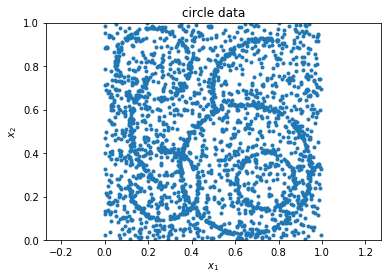

In [32]:
plt.scatter(X_coord,Y_coord, marker = ".")
plt.axis('equal')
plt.title('circle data')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.ylim((0,1))
plt.xlim((0,1))

By just counting the obvious ones we would fit 6 circles.

## 4.1 RANSAC

In [27]:
#returns cx,cy,,r
def fitCircle(points):
    x1,y1,x2,y2,x3,y3=*points.flatten(),
    A=x1*(y2-y3)-y1*(x2-x3)+x2*y3-x3*y2
    B=(x1**2+y1**2)*(y3-y2)+(x2**2+y2**2)*(y1-y3)+(x3**2+y3**2)*(y2-y1)
    C=(x1**2+y1**2)*(x2-x3)+(x2**2+y2**2)*(x3-x1)+(x3**2+y3**2)*(x1-x2)
    cx=-B/(2*A)
    cy=-C/(2*A)
    r=np.sqrt((x1-cx)**2+(y1-cy)**2)
    return cx,cy,r

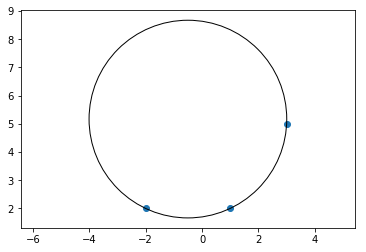

In [29]:
#showcase
c1=plt.Circle((cx,cy),radius=r,fill=False)
plt.gca().add_patch(c1)
plt.scatter(p.T[0],p.T[1])
plt.axis('equal')
plt.show()

In [100]:
def RANSAC_Circle(data,N,epsilon,return_inliers=False):
    bestCircle,inliers=None,[]
    for i in range(N):
        #choose randomly 3 points
        points=data[np.random.permutation(len(data))][:3]
        #get parameters of circle
        cx,cy,r=fitCircle(points)
        #calculate distance to circle for all points
        distances=np.abs(np.sqrt(np.sum(np.square(data-np.array([cx,cy])),axis=1))-r)
        inl=np.argwhere(distances<epsilon)
        if len(inl)>len(inliers):
            inliers=inl
            bestCircle=[cx,cy,r]
    if return_inliers:
        return bestCircle,inliers 
    else:
        return bestCircle

In [145]:
def multipleCircles(data,N,epsilon,circleNumber):
    circles=[]
    dataPoints=data.copy()
    for i in range(circleNumber):
        circle_i,inliers=RANSAC_Circle(dataPoints,N,epsilon,return_inliers=True)
        dataPoints=np.delete(dataPoints,inliers,0).reshape(-1,2)
        circles.append(circle_i)
    return circles

In [159]:
circles=multipleCircles(data,4000,.0048,6)

(0, 1)

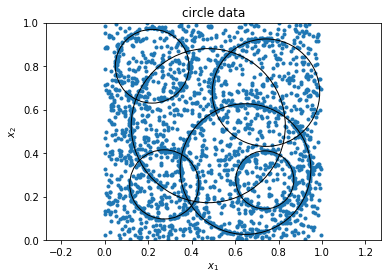

In [160]:
plt.scatter(X_coord,Y_coord, marker = ".")
for c in circles:
    ci=plt.Circle((c[0],c[1]),radius=c[2],fill=False)
    plt.gca().add_patch(ci)
plt.axis('equal')
plt.title('circle data')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.ylim((0,1))
plt.xlim((0,1))

The choice of $\epsilon$ was the hardest part. Even a small change in value lead to different solutions: If $\epsilon$ was too big the RANSAC algorithm often fitted the noise. If it was too small it would fit a circle twice.